Loaded 120
The strongest earthquake was at (-2.15, 52.52) with magnitude 4.8


C:\Users\Vedant\AppData\Local\Temp\ipykernel_10816\3185040009.py:62: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  years = [datetime.utcfromtimestamp(t / 1000).year for t in times]


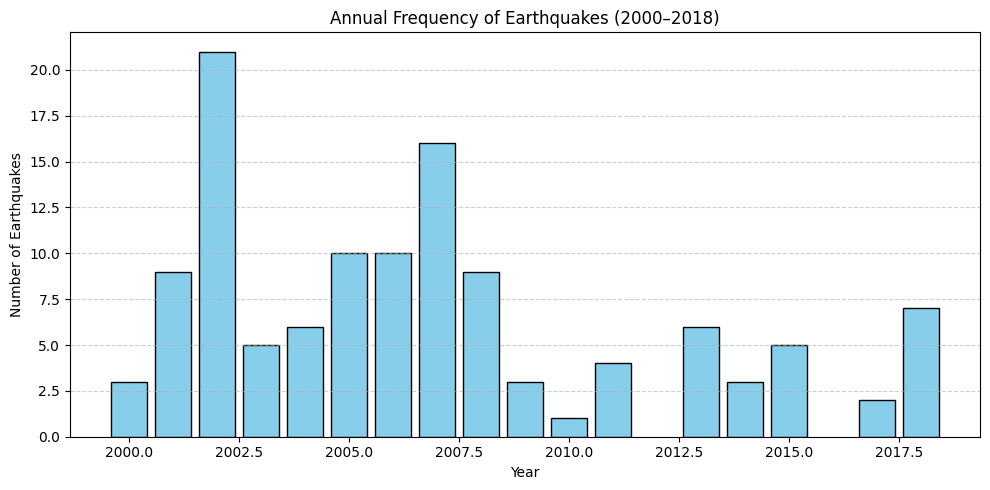

None


C:\Users\Vedant\AppData\Local\Temp\ipykernel_10816\3185040009.py:90: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  year = datetime.utcfromtimestamp(timestamp / 1000).year


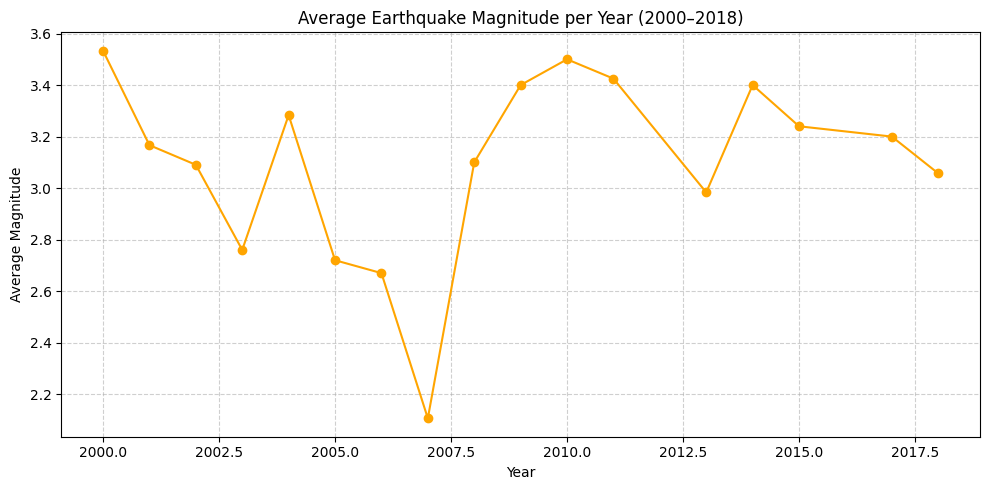

None


In [5]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from collections import defaultdict

# The Python standard library includes some functionality for communicating
# over the Internet.
# However, we will use a more powerful and simpler library called requests.
# This is external library that you may need to install first.
import requests


def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )


    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    # See the README file for more information.

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    return json.loads(text)

def count_earthquakes(data):
    """Get the total number of earthquakes in the response."""
    return data["metadata"]["count"]


def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    return earthquake["properties"]["mag"]


def get_location(earthquake):
    """Retrieve the latitude and longitude of an earthquake item."""
    coordinates = earthquake["geometry"]["coordinates"]
    # There are three coordinates, but we don't care about the third (altitude)
    return (coordinates[0], coordinates[1])

def annual_freq(data):
    times = [eq["properties"]["time"] for eq in data["features"]]

    # Convert epoch times to years
    years = [datetime.utcfromtimestamp(t / 1000).year for t in times]

    # Count how many earthquakes per year
    year_counts = Counter(years)

    # Sort by year
    years_sorted = sorted(year_counts.keys())
    counts_sorted = [year_counts[y] for y in years_sorted]

    # Plot histogram (bar chart)
    plt.figure(figsize=(10, 5))
    plt.bar(years_sorted, counts_sorted, color="skyblue", edgecolor="black")
    plt.xlabel("Year")
    plt.ylabel("Number of Earthquakes")
    plt.title("Annual Frequency of Earthquakes (2000–2018)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

def average_magnitude_per_year(data):
    """Compute and plot the average magnitude of earthquakes per year."""
    # Dictionary to store magnitudes grouped by year
    yearly_mags = defaultdict(list)

    # Iterate through all earthquakes
    for eq in data["features"]:
        # Extract timestamp and convert to year
        timestamp = eq["properties"]["time"]
        year = datetime.utcfromtimestamp(timestamp / 1000).year
        
        # Get the magnitude
        mag = get_magnitude(eq)
        if mag is not None:  # Some entries may have missing magnitudes
            yearly_mags[year].append(mag)

    # Compute the average magnitude per year
    avg_mags = {year: sum(mags)/len(mags) for year, mags in yearly_mags.items() if len(mags) > 0}

    # Sort by year
    years_sorted = sorted(avg_mags.keys())
    averages_sorted = [avg_mags[y] for y in years_sorted]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(years_sorted, averages_sorted, marker='o', color='orange')
    plt.xlabel("Year")
    plt.ylabel("Average Magnitude")
    plt.title("Average Earthquake Magnitude per Year (2000–2018)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
    

def get_maximum(data):
    """Get the magnitude and location of the strongest earthquake in the data."""
    current_max_magnitude = get_magnitude(data["features"][0])
    current_max_location = get_location(data["features"][0])
    for item in data["features"]:
        magnitude = get_magnitude(item)
        # Note: what happens if there are two earthquakes with the same magnitude?
        if magnitude > current_max_magnitude:
            current_max_magnitude = magnitude
            current_max_location = get_location(item)
    return current_max_magnitude, current_max_location
    # There are other ways of doing this too:
    # biggest_earthquake = sorted(data["features"], key=get_magnitude)[0]
    # return get_magnitude(biggest_earthquake), get_location(biggest_earthquake)
    # Or...
    # biggest_earthquake = max(
    #     ({"mag": get_magnitude(item), "location": get_location(item)}
    #     for item in data["features"]),
    #     key=lambda x: x["mag"]
    # )
    # return biggest_earthquake["mag"], biggest_earthquake["location"]


# With all the above functions defined, we can now call them and get the result
data = get_data()
print(f"Loaded {count_earthquakes(data)}")
max_magnitude, max_location = get_maximum(data)
print(f"The strongest earthquake was at {max_location} with magnitude {max_magnitude}")
print(annual_freq(data))
print(average_magnitude_per_year(data))